In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display_markdown as mkdown # as print

def nl():
    print('\n')
'''
for f in os.listdir('/resources/data/Bimbo/train/'):
    print(f.ljust(30) + str(round(os.path.getsize('/resources/data/Bimbo/train/' + f) / 1000000, 2)) + 'MB')
'''
def assemble_from_csvs(folder, cols):
    return [pd.read_csv(os.path.join(folder, fl), sep=",", header=None, names=cols) 
            for fl in os.listdir(folder)] # concatenate here! saves code

def assemble_from_csvs_train(folder, cols):
    return [pd.read_csv(os.path.join(folder, fl), 
                        dtype  = {'Semana' : 'int32',
                              'Agencia_ID' :'int32',
                              'Canal_ID' : 'int32',
                              'Ruta_SAK' : 'int32',
                              'Cliente-ID' : 'int64',
                              'Producto_ID':'int32',
                              'Venta_hoy':'float32',
                              'Venta_uni_hoy': 'int32',
                              'Dev_uni_proxima':'int32',
                              'Dev_proxima':'float32',
                              'Demanda_uni_equil':'int32'},
                        sep=",", header=None, names=cols) 
            for fl in os.listdir(folder)] # concatenate here! saves code


In [2]:
test_folder = "/resources/data/Bimbo/test/"
test_cols = ['id','Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']
test_list = assemble_from_csvs(test_folder, test_cols)
test_df = pd.concat(test_list, axis=0, ignore_index=True)


In [3]:
test_df.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,3999999,11,2233,1,1214,8423811,31423
1,4000000,10,1122,1,1049,1130145,1146
2,4000001,11,4046,1,1129,587111,43118
3,4000002,10,2220,1,4424,4471730,34225
4,4000003,11,1224,1,2158,1161803,36747


In [4]:
test_df = test_df.sort_values(by = 'id')
test_df.reset_index(drop=True, inplace=True)

In [5]:
test_df.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [7]:
test_df.describe()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
count,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06,6.999251e+06
mean,3.499625e+06,1.049446e+01,2.504463e+03,1.401874e+00,2.138014e+03,1.819128e+06,2.216307e+04
std,2.020510e+06,4.999694e-01,4.010228e+03,1.513404e+00,1.500392e+03,2.938910e+06,1.869816e+04
min,0.000000e+00,1.000000e+01,1.110000e+03,1.000000e+00,1.000000e+00,2.600000e+01,4.100000e+01
25%,1.749812e+06,1.000000e+01,1.311000e+03,1.000000e+00,1.159000e+03,3.558290e+05,1.242000e+03
50%,3.499625e+06,1.000000e+01,1.612000e+03,1.000000e+00,1.305000e+03,1.200109e+06,3.150700e+04
75%,5.249438e+06,1.100000e+01,2.034000e+03,1.000000e+00,2.804000e+03,2.387881e+06,4.093000e+04
max,6.999250e+06,1.100000e+01,2.575900e+04,1.100000e+01,9.950000e+03,2.015152e+09,4.999700e+04


In [2]:
train_folder = "/resources/data/Bimbo/train/"
train_cols = ['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima','Demanda_uni_equil']
train_list = assemble_from_csvs_train(train_folder, train_cols)

In [4]:
l = len(train_list)
print l

15


In [14]:
train_df = pd.concat(train_list[:1], axis=0, ignore_index=True)

In [15]:
train_df.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,6,2020,1,2402,100614,31507,5,26.000000,0,0.0,5
1,6,2020,1,2402,100614,31586,4,44.000000,0,0.0,4
2,6,2020,1,2402,100614,43058,5,43.599998,0,0.0,5
3,6,2020,1,2402,250149,30549,2,10.760000,0,0.0,2
4,6,2020,1,2402,250149,31507,4,25.000000,0,0.0,4


In [36]:
pd.options.display.float_format = '{0:.2f}'.format

In [37]:
train_df.describe()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00
mean,6.40,3642.87,1.29,2044.07,1714136.70,18690.48,7.39,72.36,0.13,1.35,7.30
std,0.49,5790.16,1.25,1413.48,3222958.29,18482.59,22.49,393.99,2.83,27.16,22.35
min,6.00,1110.00,1.00,1.00,26.00,41.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,1153.00,1.00,1157.00,345798.00,1240.00,2.00,16.76,0.00,0.00,2.00
50%,6.00,2043.00,1.00,1409.00,1121439.00,4910.00,3.00,30.20,0.00,0.00,3.00
75%,7.00,2629.00,1.00,2159.00,2302039.00,36304.00,7.00,57.60,0.00,0.00,6.00
max,7.00,25759.00,11.00,9929.00,2015152015.00,49996.00,4936.00,382694.41,2800.00,30907.00,4936.00


# tell the notebook server to render charts inline

In [20]:
%matplotlib inline 

In [21]:
def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

In [22]:
target = train_df['Demanda_uni_equil'].tolist()

In [13]:
len(target)

24180465

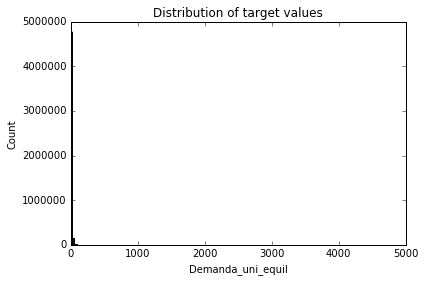

In [23]:
plt.hist(target, bins=200, color='blue')
label_plot('Distribution of target values', 'Demanda_uni_equil', 'Count')

In [18]:
plt.show()